In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from pyclustertend import hopkins
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# k-means algorithm requires scaling since it highly depends on distances between
# data points. However, we don't really have to scale the iris dataset for
# all the columns are pretty much of similar values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [8]:
# So we ideally have 3 different clusters.

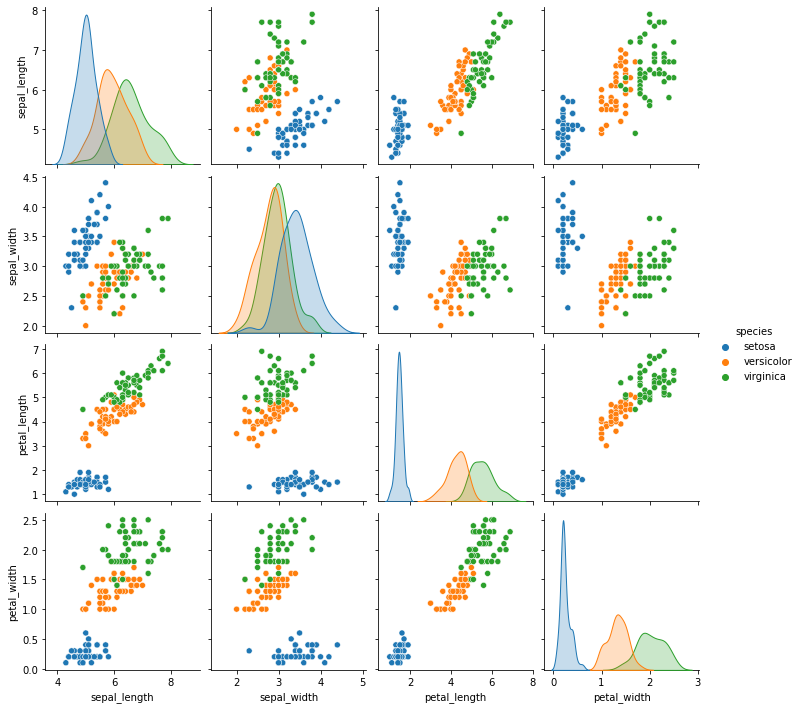

In [9]:
sns.pairplot(df, hue="species")

In [10]:
# Since we already know the clusters in the original dataset, we don't
# have to look for the optimal k value. However, we normally should
# look for the ideal k value using the "elbow" method.

In [11]:
X = df.drop("species", axis=1)

In [12]:
# We dropped the species field in order to try and see if the machine can actually
# figure out that 3 is the ideal k value.

In [13]:
X.shape

(150, 4)

In [14]:
hopkins(X, X.shape[0])

0.16764007773228412

In [15]:
# So clustering can be useful to classify the observations.

In [16]:
ssd = []  # Sum of squared differences (errors).
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

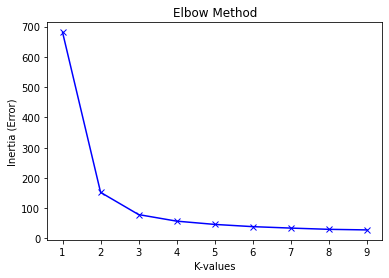

In [17]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K-values")
plt.ylabel("Inertia (Error)")
plt.title("Elbow Method")

In [18]:
# So according to the elbow method, 3 seems like the best choice here. The goal here is
# to use the least k value while clustering the dataset optimally. Because, the higher
# the k value is, the less different the clusters are from each other. 

In [19]:
model = KMeans(n_clusters=3)

In [20]:
model.fit(X)

KMeans(n_clusters=3)

In [21]:
model

KMeans(n_clusters=3)

In [22]:
model.inertia_

78.851441426146

In [23]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
clusters = model.labels_

In [25]:
df["pred_clusters"] = clusters

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [27]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred_clusters
63,6.1,2.9,4.7,1.4,versicolor,0
10,5.4,3.7,1.5,0.2,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
112,6.8,3.0,5.5,2.1,virginica,2
144,6.7,3.3,5.7,2.5,virginica,2
88,5.6,3.0,4.1,1.3,versicolor,0
15,5.7,4.4,1.5,0.4,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
102,7.1,3.0,5.9,2.1,virginica,2
35,5.0,3.2,1.2,0.2,setosa,1


In [28]:
ct = pd.crosstab(df.pred_clusters, df.species)

In [29]:
ct

species,setosa,versicolor,virginica
pred_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

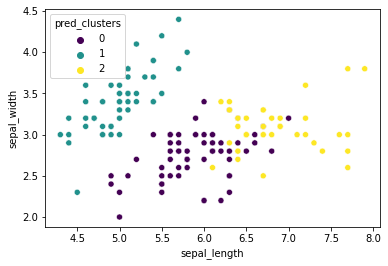

In [30]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=df, hue="pred_clusters", palette="viridis")

In [31]:
# plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.pred_clusters, cmap="viridis")

In [32]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [33]:
centers = model.cluster_centers_

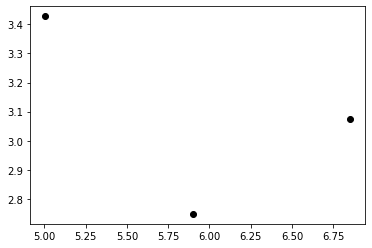

In [34]:
plt.scatter(centers[:, 0], centers[:, 1], c="black")

In [35]:
# sns.scatterplot(centers[:, 0], centers[:, 1])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

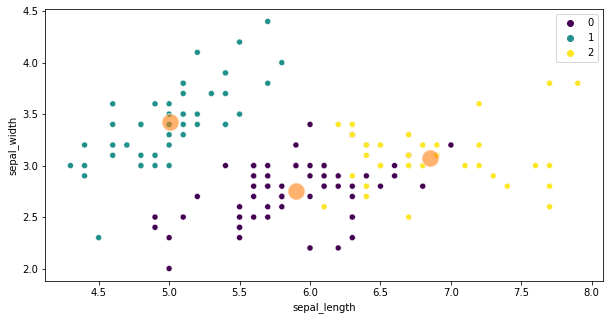

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="sepal_length", y="sepal_width", data=df, hue="pred_clusters", palette="viridis")
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=300, alpha=0.6)
# plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

In [37]:
hc_complete = linkage(X, "complete")
hc_ward = linkage(X, "ward")

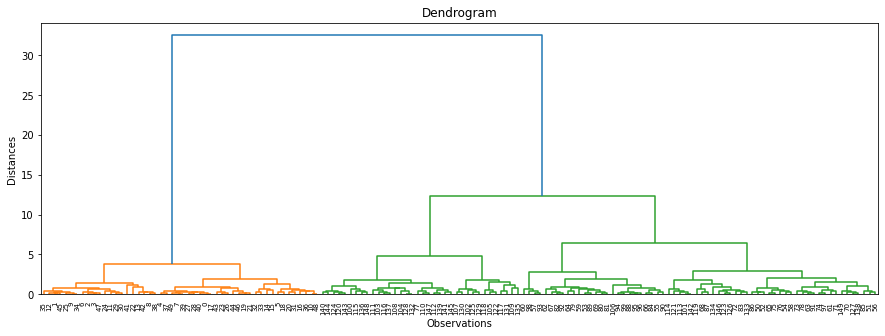

In [38]:
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(hc_ward, leaf_font_size=7)
plt.show()

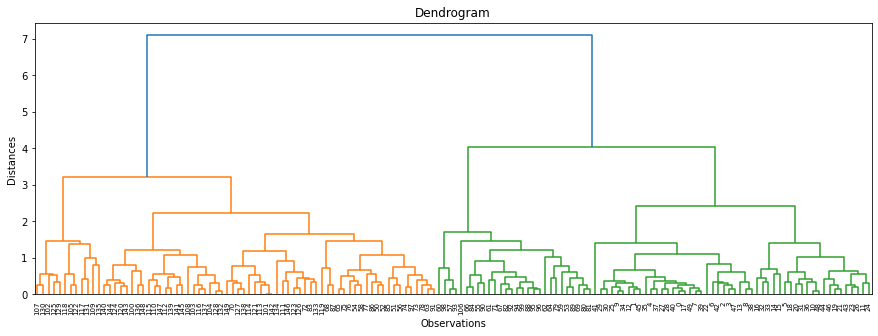

In [39]:
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(hc_complete, leaf_font_size=7)
plt.show()

In [40]:
model = AgglomerativeClustering(n_clusters=3, linkage="ward")
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [41]:
clusters = model.labels_

In [42]:
df["pred_clusters"] = clusters

In [43]:
ct = pd.crosstab(df.pred_clusters, df.species)

In [44]:
ct

species,setosa,versicolor,virginica
pred_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [45]:
map_dict = {"virginica": 2,
           "setosa": 1,
           "versicolor": 0}

In [46]:
df["original_clusters"] = df.species.map(map_dict)

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred_clusters,original_clusters
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


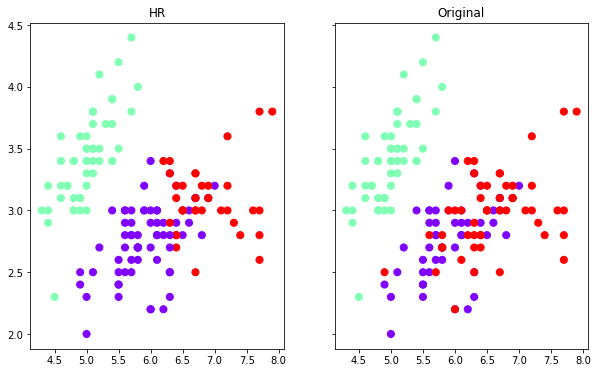

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title("HR")
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c=df.pred_clusters, s=50, cmap="rainbow")
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c=df.original_clusters, s=50, cmap="rainbow")
plt.show()

In [50]:
print(f"Silhouette Score(n=3): {silhouette_score(X, model.labels_)}")

Silhouette Score(n=3): 0.5543236611296426


In [51]:
adjusted_rand_score(df["species"], df["pred_clusters"])

0.7311985567707745